In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
#converting data to pandas data frame
data = pd.read_csv('/home/panther/Downloads/Autism_Data.arff')

In [3]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [4]:
# we can see some ? symbol which means they are null values
# we have to replace them as null values
data.replace('?',np.nan,inplace =True)

In [5]:
#now lets check nll values
data.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [6]:
#replacing null values with their mean and median
data['relation'].fillna(data['relation'].mode()[0],inplace=True)

In [7]:
#finding outliers 
#age series is in objet so we are converting it to foat to find ouyliers
data['age'] = data['age'].astype(float)
data['age'].fillna(data['age'].mean(),inplace=True)
num_col =  data.columns[data.dtypes != 'object']
#finding outliers based on z score 
z = np.abs(stats.zscore(data[num_col]))
print(np.where(z > 3))


(array([52]), array([10]))


In [8]:
#removing outlier \
data = data.drop(52,axis=0)
data = data.drop('age_desc',axis=1)

In [9]:
# label encoading for target variable
le = preprocessing.LabelEncoder()
le.fit(data['Class/ASD'].values)
data['Class/ASD'].replace(data['Class/ASD'].values,le.transform(data['Class/ASD']),inplace=True)
#getting catogorial columns to do label enocoading
cat_col = data.columns[data.dtypes == 'object']

In [10]:
#corelation mattrix
cor = data.corr()

<AxesSubplot:>

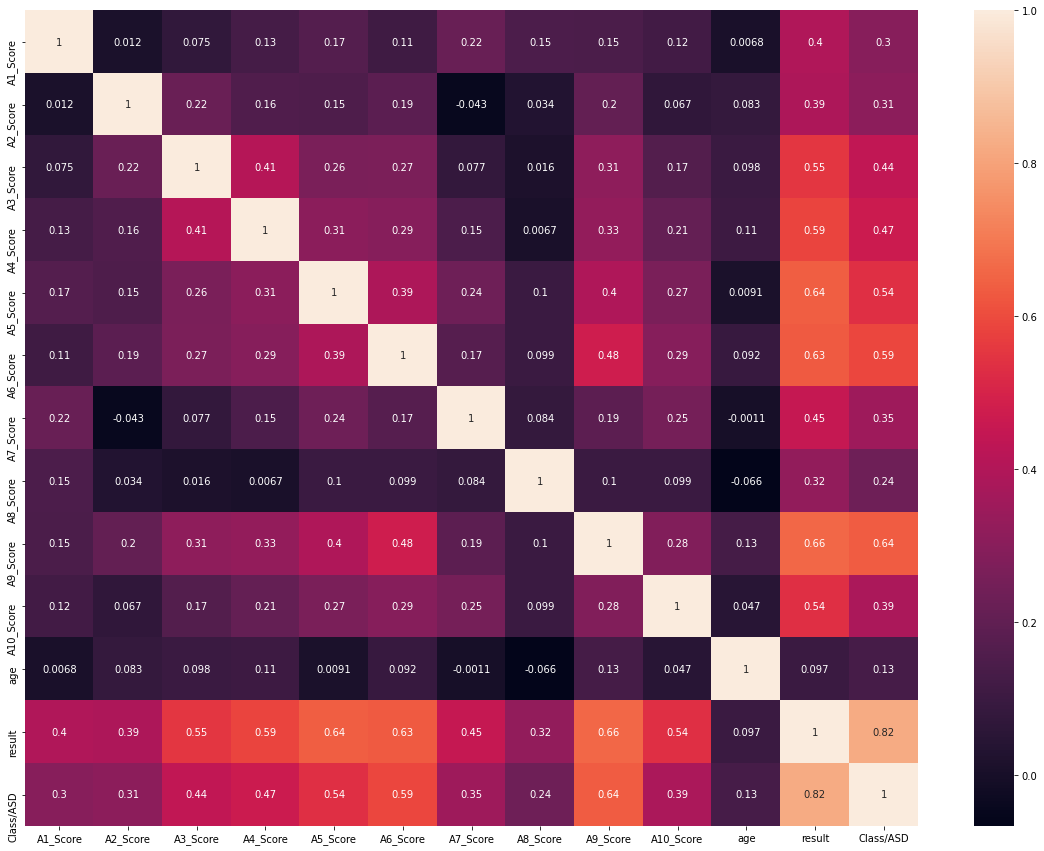

In [79]:
#lets see the relation between each feature with the target variable
#from this we can say result is highly related with target variable
plt.subplots(figsize=(20,15))
sns.heatmap(cor,annot = True)

In [11]:
#result is highly co relate with other colummns 
data = data.drop('result',axis=1)

data = data.dropna()

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

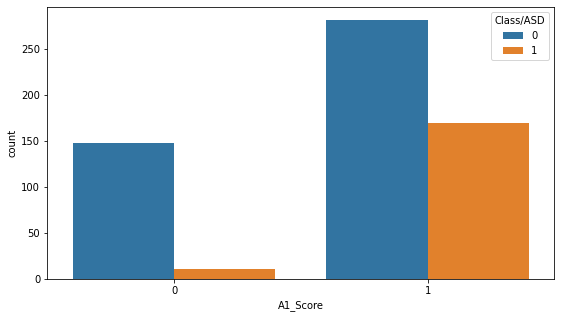

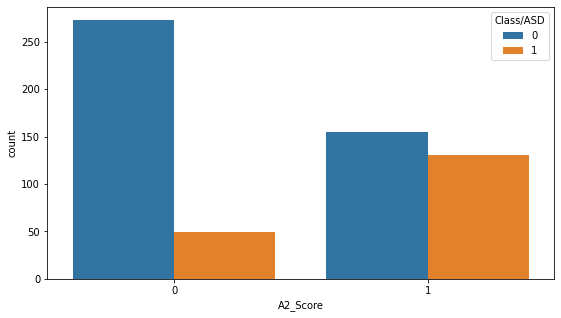

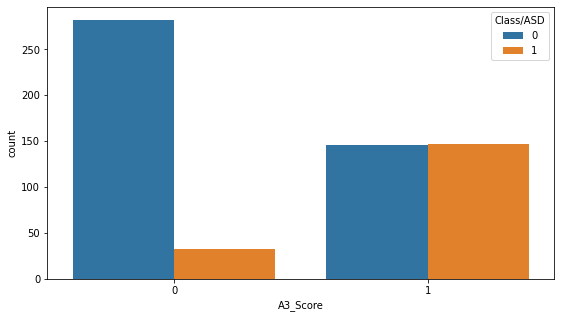

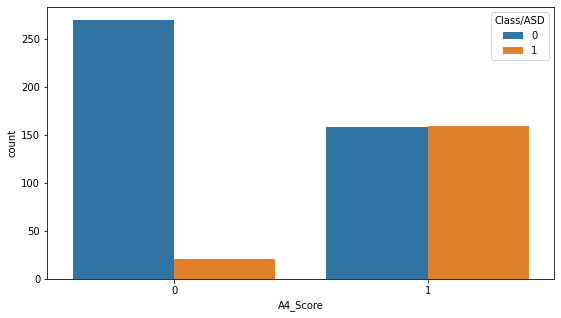

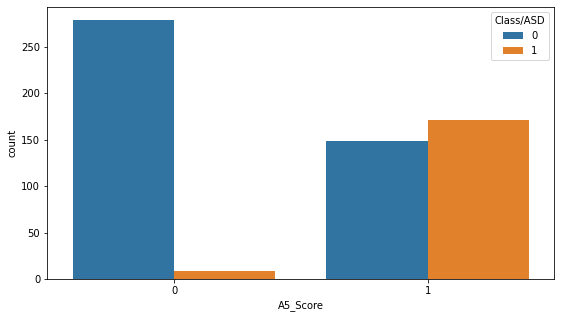

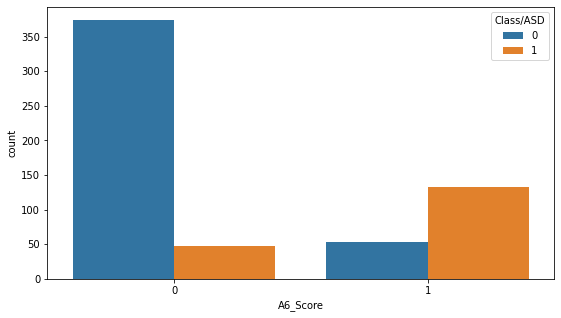

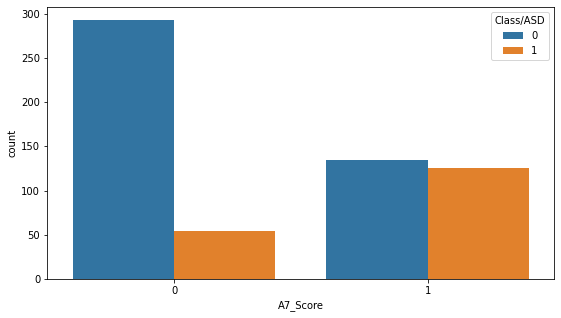

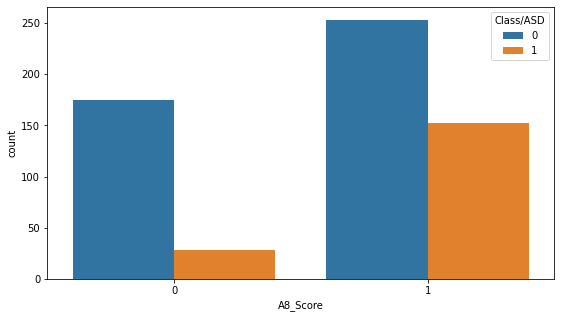

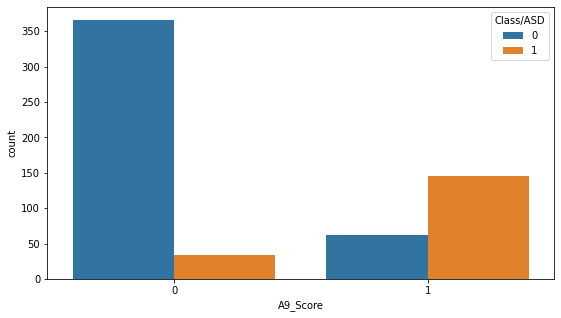

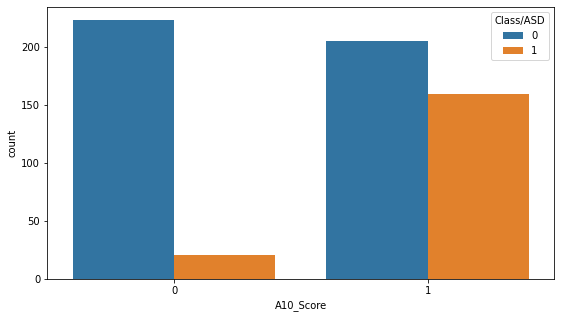

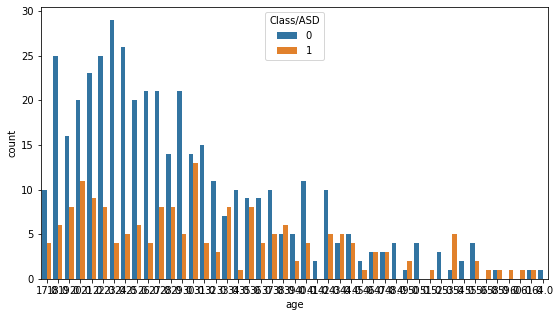

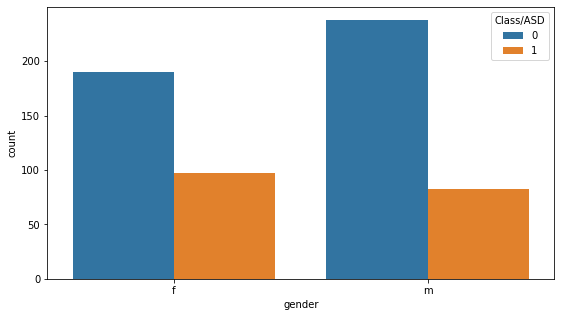

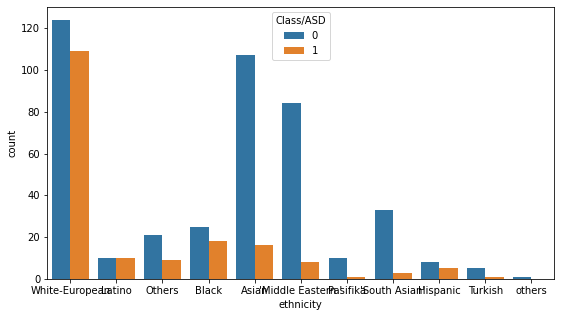

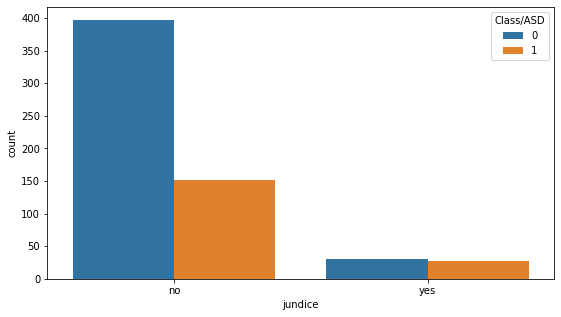

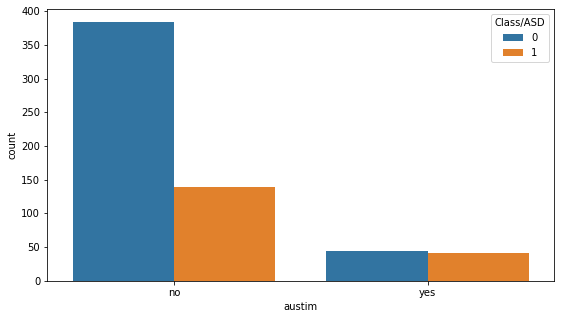

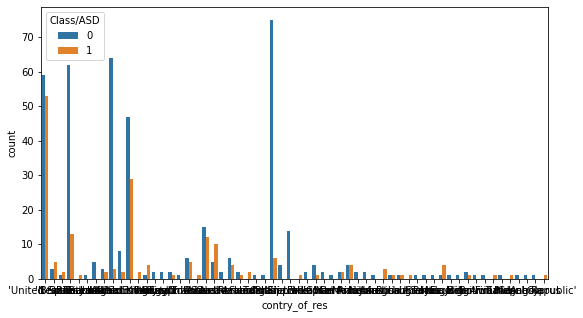

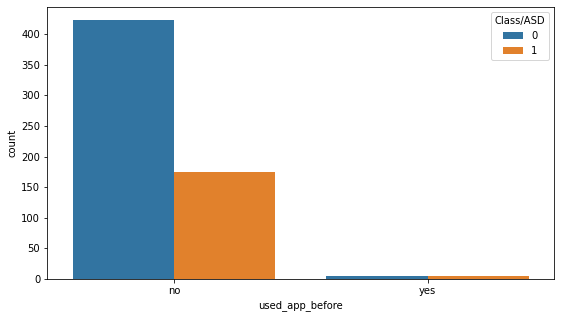

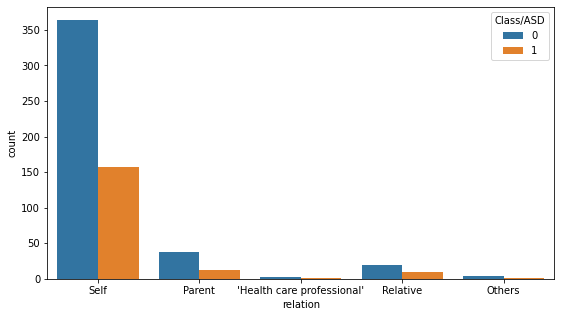

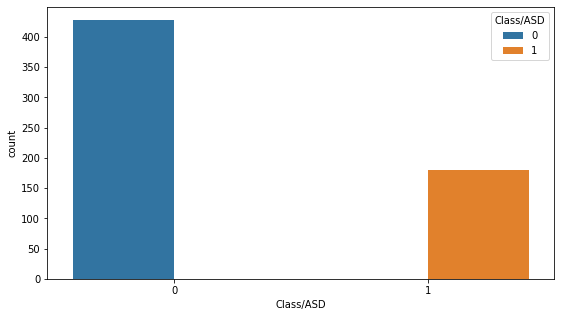

In [81]:
#now lets see how catogorial variabls are related with target variable
for i in data.columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.countplot(i,hue='Class/ASD',data=data)

In [12]:
# label encoading using one-hot encoader
data = pd.get_dummies(data,columns=cat_col)

#removing target feature from the data set
X = data.drop('Class/ASD',axis=1)
y = data['Class/ASD']

#splitting data set inti train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# feature selection using random forest

In [13]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.9353233830845771
precision_score = 0.9351202134125751
 
DecisionTreeClassifier - 
recall_score = 0.9054726368159204
precision_score = 0.9351202134125751
 
RandomForestClassifier - 
Precision= 0.9551620778097092
recall= 0.9552238805970149


# feature selection using Decision tree

In [14]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(DecisionTreeClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.9402985074626866
precision_score = 0.9400295511493626
 
DecisionTreeClassifier - 
recall_score = 0.9154228855721394
precision_score = 0.9400295511493626
 
RandomForestClassifier - 
Precision= 0.9450830732466035
recall= 0.945273631840796


# feature selection using Logistic regression

In [15]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(LogisticRegression())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - 
recall_score = 0.945273631840796
precision_score = 0.9455335263978615
 
DecisionTreeClassifier - 
recall_score = 0.9104477611940298
precision_score = 0.9455335263978615
 
RandomForestClassifier - 
Precision= 0.9502487562189055
recall= 0.9502487562189055


# Random forest classifier model wroks better for this data using feature selection based on Random forest